In [18]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [19]:
df=pd.read_csv('Laundry_Data.csv')

# Data Cleaning


In [20]:
df.info()
#df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             807 non-null    int64  
 1   Date           807 non-null    object 
 2   Time           807 non-null    object 
 3   Race           752 non-null    object 
 4   Gender         716 non-null    object 
 5   Body_Size      709 non-null    object 
 6   Age_Range      756 non-null    float64
 7   With_Kids      725 non-null    object 
 8   Kids_Category  777 non-null    object 
 9   Basket_Size    752 non-null    object 
 10  Basket_colour  717 non-null    object 
 11  Attire         776 non-null    object 
 12  Shirt_Colour   720 non-null    object 
 13  shirt_type     770 non-null    object 
 14  Pants_Colour   802 non-null    object 
 15  pants_type     712 non-null    object 
 16  Wash_Item      718 non-null    object 
 17  Washer_No      807 non-null    int64  
 18  Dryer_No  

In [21]:
def fill_null_val(df):
    return df.fillna('Unknown')

def change_to_dateTime(df):
    datetimeCol=pd.to_datetime(df['Date'], infer_datetime_format=True)
    return df.assign(Date=datetimeCol)

def get_day_col(df):
    dayCol=pd.DatetimeIndex(df['Date']).day
    return df.assign(Day=dayCol)

def get_month_col(df):
    monthCol=pd.DatetimeIndex(df['Date']).month
    return df.assign(Month=monthCol)

def fill_age(df):
    age=df['Age_Range'].fillna(round(df['Age_Range'].mean()))
    return df.assign(Age_Range=age)

def fill_withKids_yes(df):
    with_kids = np.where(df["Kids_Category"]=='no_kids',df['With_Kids'],'yes')
    return df.assign(With_Kids=with_kids)

def fill_withKids_no(df):
    with_kids = np.where(df["Kids_Category"]!='no_kids',df['With_Kids'],'no')
    return df.assign(With_Kids=with_kids)

In [22]:
df.head()

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,NaN,moderate,NaN,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,NaN,short_sleeve,blue_jeans,long,NaN,6,9,no
2,3,19/10/2015,20:58:31,malay,female,NaN,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,NaN,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,NaN,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no


In [23]:
df=(df.pipe(change_to_dateTime)
                .pipe(get_day_col)
                .pipe(get_month_col)
                .pipe(fill_age)
                .pipe(fill_withKids_yes)
                .pipe(fill_withKids_no)
                .pipe(fill_null_val)
             )

In [7]:
len(df[df.isnull().any(axis=1)])/len(df)*100


0.0

In [8]:
df.isnull().sum()

No               0
Date             0
Time             0
Race             0
Gender           0
Body_Size        0
Age_Range        0
With_Kids        0
Kids_Category    0
Basket_Size      0
Basket_colour    0
Attire           0
Shirt_Colour     0
shirt_type       0
Pants_Colour     0
pants_type       0
Wash_Item        0
Washer_No        0
Dryer_No         0
Spectacles       0
Day              0
Month            0
dtype: int64

In [9]:
print('Race\n',df['Race'].value_counts())
print('Gender\n',df['Gender'].value_counts())
print('Body_Size\n',df['Body_Size'].value_counts())
print('With_Kids\n',df['With_Kids'].value_counts())
print('Kids_Category\n',df['Kids_Category'].value_counts())



Race
 indian        227
malay         222
chinese       221
foreigner      82
Unknown        55
Name: Race, dtype: int64
Gender
 female     361
male       355
Unknown     91
Name: Gender, dtype: int64
Body_Size
 fat         247
moderate    237
thin        225
Unknown      98
Name: Body_Size, dtype: int64
With_Kids
 no     603
yes    204
Name: With_Kids, dtype: int64
Kids_Category
 no_kids     603
young        90
toddler      47
baby         36
Unknown      30
toddler       1
Name: Kids_Category, dtype: int64


In [10]:
df.describe()

,No,Age_Range,Washer_No,Dryer_No,Day,Month
count,807.000000,807.000000,807.000000,807.000000,807.00000,807.000000
mean,404.000000,42.040892,4.465923,8.418835,21.80917,10.745973
std,233.105126,7.758262,1.152628,1.142694,8.49351,0.481577
min,1.000000,28.000000,3.000000,7.000000,1.00000,10.000000
25%,202.500000,36.000000,3.000000,7.000000,20.00000,10.000000
50%,404.000000,42.000000,4.000000,8.000000,24.00000,11.000000
75%,605.500000,49.000000,6.000000,9.000000,28.00000,11.000000
max,807.000000,55.000000,6.000000,10.000000,30.00000,12.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   No             807 non-null    int64         
 1   Date           807 non-null    datetime64[ns]
 2   Time           807 non-null    object        
 3   Race           807 non-null    object        
 4   Gender         807 non-null    object        
 5   Body_Size      807 non-null    object        
 6   Age_Range      807 non-null    float64       
 7   With_Kids      807 non-null    object        
 8   Kids_Category  807 non-null    object        
 9   Basket_Size    807 non-null    object        
 10  Basket_colour  807 non-null    object        
 11  Attire         807 non-null    object        
 12  Shirt_Colour   807 non-null    object        
 13  shirt_type     807 non-null    object        
 14  Pants_Colour   807 non-null    object        
 15  pants_type     807 non-

In [12]:
df_oneHot = pd.get_dummies(df, prefix='BC', columns=['Basket_colour'])
df_oneHot1 = pd.get_dummies(df_oneHot, prefix='Gen', columns=['Gender'])
df_oneHot2 = pd.get_dummies(df_oneHot1, prefix='Att', columns=['Attire'])
df_oneHot3 = pd.get_dummies(df_oneHot2, prefix='Wash', columns=['Washer_No'])
df_oneHot4 = pd.get_dummies(df_oneHot3, prefix='Dry', columns=['Dryer_No'])

#df_oneHot
df_oneHot4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   No               807 non-null    int64         
 1   Date             807 non-null    datetime64[ns]
 2   Time             807 non-null    object        
 3   Race             807 non-null    object        
 4   Body_Size        807 non-null    object        
 5   Age_Range        807 non-null    float64       
 6   With_Kids        807 non-null    object        
 7   Kids_Category    807 non-null    object        
 8   Basket_Size      807 non-null    object        
 9   Shirt_Colour     807 non-null    object        
 10  shirt_type       807 non-null    object        
 11  Pants_Colour     807 non-null    object        
 12  pants_type       807 non-null    object        
 13  Wash_Item        807 non-null    object        
 14  Spectacles       807 non-null    object   

In [13]:
df1=df_oneHot4.drop(['No'], axis = 1) 

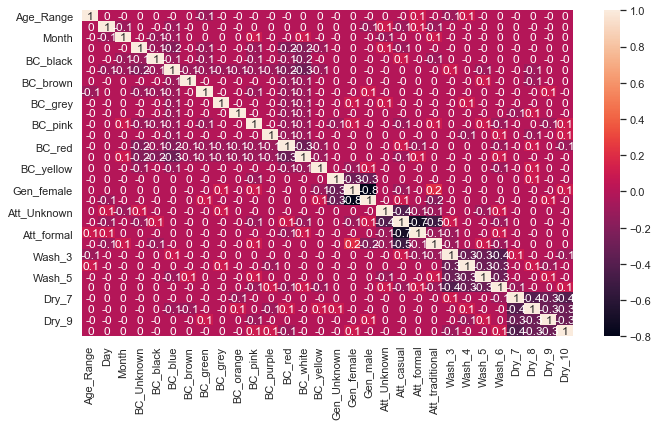

In [14]:
sns.set(rc={'figure.figsize':(11,6)})
#correlation matrix
correlation_matrix = df1.iloc[:,:].corr().round(1)

sns.heatmap(data=correlation_matrix, annot=True)


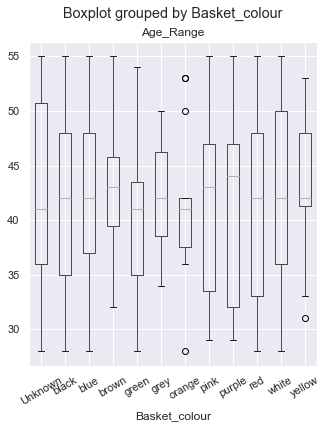

In [17]:
df.boxplot('Age_Range','Basket_colour',rot = 30,figsize=(5,6))

In [16]:
#hi